<h3>1. Import dependencies</h3>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import torch
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from utils.scores import purity_score as purity

from src import KMeans

<h3>2. Import data</h3>

In [2]:
df = pd.read_csv('iris.csv', na_values='?')
df = df.fillna(0)
classes = df.iloc[:, len(df.columns)-1].to_numpy()

X = torch.from_numpy(df.iloc[:, 0:len(df.columns)-1].to_numpy()).cuda()
y = torch.from_numpy(LabelEncoder().fit_transform(np.asarray(classes))).cuda()

<h3>3. K-Means</h3>

In [3]:
start = time.time()
km = KMeans(n_clusters=3)
km.fit(X)
km_time = time.time() - start
asc = silhouette_score(X.cpu().numpy(), km.labels_.cpu().numpy(),
                       metric='euclidean')
acc = purity(y, km.labels_) * 100

print("Initialization & clustering finished in {:.3} seconds.".format(km_time))
print("[Unsupervised Performance] Silhouette Score: {:.4f}".format(asc))
print("[Supervised   Performance] Accuracy: {:.2f} %".format(acc))

Initialization & clustering finished in 0.0782 seconds.
[Unsupervised Performance] Silhouette Score: 0.5512
[Supervised   Performance] Accuracy: 88.67 %


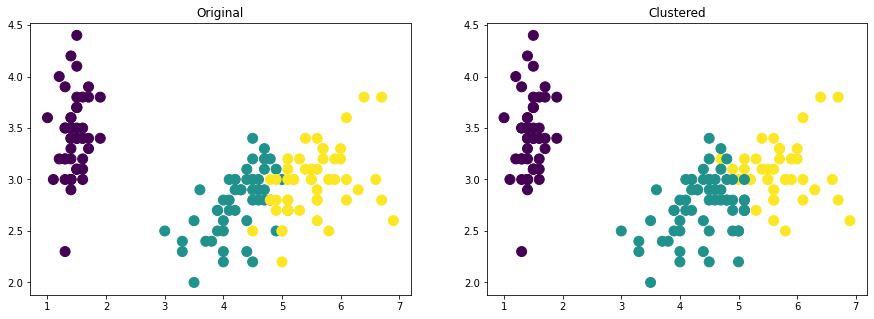

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].scatter(X.cpu().numpy()[:, 2], X.cpu().numpy()[:, 1],
                 c=y.cpu().numpy(), s=100)
ax[0].set_title('Original')
ax[1].scatter(X.cpu().numpy()[:, 2], X.cpu().numpy()[:, 1], 
              c=km.labels_.cpu().numpy(), s=100)
ax[1].set_title('Clustered')
plt.show()

<h3>4. Spherical K-Means</h3>

In [5]:
start = time.time()
km = KMeans(n_clusters=3, spherical=True)
km.fit(X)
km_time = time.time() - start
asc = silhouette_score(X.cpu().numpy(), km.labels_.cpu().numpy(), metric='cosine')
acc = purity(y, km.labels_) * 100

print("Initialization & clustering finished in {:.3} seconds.".format(km_time))
print("[Unsupervised Performance] Silhouette Score: {:.4f}".format(asc))
print("[Supervised   Performance] Accuracy: {:.2f} %".format(acc))

Initialization & clustering finished in 0.0614 seconds.
[Unsupervised Performance] Silhouette Score: 0.7491
[Supervised   Performance] Accuracy: 96.67 %


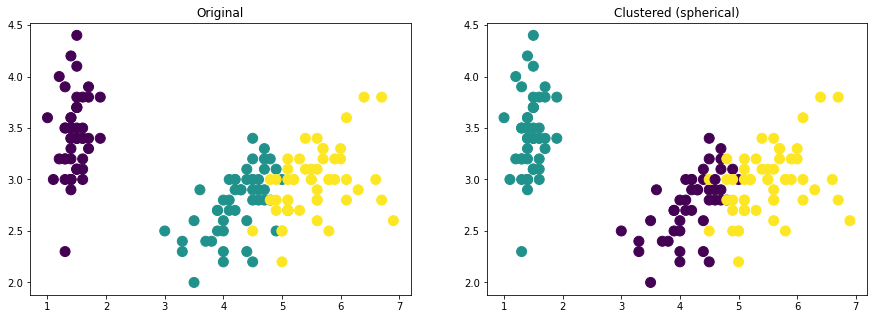

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].scatter(X.cpu().numpy()[:, 2], X.cpu().numpy()[:, 1],
                 c=y.cpu().numpy(), s=100)
ax[0].set_title('Original')
ax[1].scatter(X.cpu().numpy()[:, 2], X.cpu().numpy()[:, 1], 
              c=km.labels_.cpu().numpy(), s=100)
ax[1].set_title('Clustered (spherical)')
plt.show()

<h3>5. Spherical DISCERN + K-Means</h3>

In [7]:
start = time.time()
km = KMeans(n_clusters=None, init='discern', spherical=True)
km.fit(X)
km_time = time.time() - start
asc = silhouette_score(X.cpu().numpy(), km.labels_.cpu().numpy(),
                       metric='cosine')
acc = purity(y, km.labels_) * 100
n_clusters = len(np.unique(km.labels_.cpu().numpy()))

print("Initialization & clustering finished in {:.3} seconds.".format(km_time))
print("[Unsupervised Performance] Silhouette Score: {:.4f}".format(asc))
print("[Supervised   Performance] Accuracy: {:.2f} %".format(acc))
print("Predicted number of clusters: {}".format(n_clusters))

Initialization & clustering finished in 0.0342 seconds.
[Unsupervised Performance] Silhouette Score: 0.7485
[Supervised   Performance] Accuracy: 97.33 %
Predicted number of clusters: 3


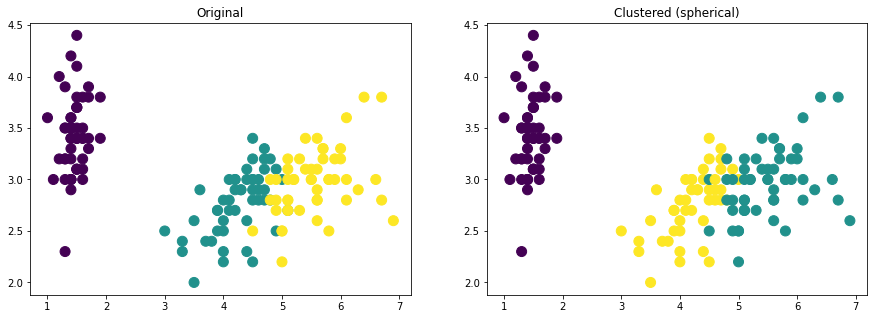

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].scatter(X.cpu().numpy()[:, 2], X.cpu().numpy()[:, 1],
                 c=y.cpu().numpy(), s=100)
ax[0].set_title('Original')
ax[1].scatter(X.cpu().numpy()[:, 2], X.cpu().numpy()[:, 1], 
              c=km.labels_.cpu().numpy(), s=100)
ax[1].set_title('Clustered (spherical)')
plt.show()